# G2M insight for Cab Investment firm

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

## Import DataSets

In [2]:
cab_df = pd.read_csv('DataSets/Cab_Data.csv')
city_df = pd.read_csv('DataSets/City.csv')
cust_df = pd.read_csv('DataSets/Customer_ID.csv')
tran_df = pd.read_csv('DataSets/Transaction_ID.csv')

##### 1- cad_df: this data includes details of transaction for 2 cab companies
* ######  view the fields' names and take a glance at the data in the set



In [3]:
cab_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


first observation: the date format is wrong.

In [4]:
cab_df.sort_values(by=['KM Travelled'])
#for a better observation, I sorted the dataframe according to the km travelled

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
301382,10370047,43344,Yellow Cab,SAN DIEGO CA,1.9,30.90,26.904
231134,10282539,43092,Yellow Cab,NEW YORK NY,1.9,46.44,23.940
28417,10036034,42518,Pink Cab,CHICAGO IL,1.9,22.30,22.040
196925,10242066,43028,Pink Cab,SILICON VALLEY,1.9,27.06,22.800
231057,10282462,43089,Yellow Cab,NEW YORK NY,1.9,50.62,25.080
...,...,...,...,...,...,...,...
194768,10239225,43016,Yellow Cab,MIAMI FL,48.0,978.68,650.880
257515,10315682,43187,Yellow Cab,WASHINGTON DC,48.0,709.47,662.400
131268,10161496,42827,Yellow Cab,LOS ANGELES CA,48.0,1096.57,685.440
356033,10435572,43464,Yellow Cab,NEW YORK NY,48.0,1214.12,645.120


In [5]:
price = cab_df['Price Charged'].mean()
print(round(price, 3))

423.443


In [6]:
cost = cab_df['Cost of Trip'].mean()
print(round(cost, 3))

286.19


Here the average cost and price are not a valueable info since prices depend on km travelled.

In [7]:
#the trip cost is the basic price without profits.
#range_of_price is calculates the profit
range_of_price = cab_df['Price Charged'] - cab_df['Cost of Trip']

In [8]:
cab_df['Profit'] = range_of_price

In [9]:
cab_df.sort_values(by=['Profit'])

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
118348,10145287,42785,Pink Cab,DALLAS TX,44.80,317.54,537.6000,-220.0600
18954,10024048,42473,Pink Cab,DALLAS TX,42.56,303.51,502.2080,-198.6980
54991,10069188,42610,Yellow Cab,TUCSON AZ,44.07,415.37,592.3008,-176.9308
23384,10029696,42494,Pink Cab,DALLAS TX,43.29,328.85,497.8350,-168.9850
115200,10141320,42765,Pink Cab,DALLAS TX,48.00,354.36,518.4000,-164.0400
...,...,...,...,...,...,...,...,...
138732,10170703,42855,Yellow Cab,NEW YORK NY,41.65,1918.14,509.7960,1408.3440
138548,10170519,42855,Yellow Cab,NEW YORK NY,41.81,1981.05,556.9092,1424.1408
138766,10170737,42855,Yellow Cab,NEW YORK NY,43.20,2013.95,580.6080,1433.3420
138669,10170640,42860,Yellow Cab,NEW YORK NY,43.29,2016.70,571.4280,1445.2720


It is obvious that in some trips the companies lost money.

In [10]:
#looking to null values

cab_df.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Profit            0
dtype: int64

##### 2- city_df: this file contains list of US cities, their population and number of cab users

In [11]:
city_df

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [12]:
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,SILICON VALLEY,"698,371","27,247"
freq,1,1,1


In [13]:
city_df.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

##### 3- cust_df: this is a mapping table that contains a unique identifier which links the customer’s demographic details

In [14]:
cust_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [15]:
#drop columns so the describe column won't take them into consideration
cust = cust_df.drop(columns=['Customer ID', 'Age', 'Gender'])

In [16]:
cust.describe()

,Income (USD/Month)
count,49171.000000
mean,15015.631856
std,8002.208253
min,2000.000000
25%,8289.500000
50%,14656.000000
75%,21035.000000
max,35000.000000


In [17]:
cust_df.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

##### 4-tran_df: this is a mapping table that contains transaction to customer mapping and payment mode

In [18]:
tran_df

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [19]:
tran_df.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [20]:
# Select duplicate rows except first occurrence based on all columns
repeat_cust = tran_df[tran_df['Customer ID'].duplicated()]
# print("Duplicate Rows except first occurrence based on all columns are :")
# print(repeat_cust)

In [21]:
repeat_cust

,Transaction ID,Customer ID,Payment_Mode
35,10000046,5734,Cash
85,10000096,8927,Cash
253,10000264,43331,Cash
268,10000279,43708,Cash
308,10000319,43151,Cash
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [22]:
unique_cust = tran_df[tran_df['Customer ID'].duplicated()==False]

In [23]:
unique_cust

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
439788,10439799,12490,Cash
439809,10439820,14971,Card
439827,10439838,41414,Card
439829,10439840,41677,Cash


To make sure of my calculations, we have 390927 customers who used both or at least one company more than once
and 49171 who used either companies only once, 390927 + 49171 = 440098 which is the total number of tran_df rows

## Merging DataSets

As quick reminder of the rows' names

In [24]:
cab_df.head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315


In [25]:
city_df.head(1)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"


In [26]:
cust_df.head(1)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813


In [27]:
tran_df.head(1)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card


* Merge transaction dataframe (tran_df) and Customer dataframe (cust_df) on Customer ID

In [28]:
tran_df.shape

(440098, 3)

In [29]:
cust_df.shape

(49171, 4)

It is clear that the dataframes' rows are not equal

In [30]:
full_cust = pd.merge(cust_df, tran_df, on=["Customer ID"], how='outer')

In [31]:
full_cust

,Customer ID,Gender,Age,Income (USD/Month),Transaction ID,Payment_Mode
0,29290,Male,28,10813,10000011,Card
1,29290,Male,28,10813,10351127,Cash
2,29290,Male,28,10813,10412921,Card
3,27703,Male,27,9237,10000012,Card
4,27703,Male,27,9237,10320494,Card
...,...,...,...,...,...,...
440093,12490,Male,33,18713,10439799,Cash
440094,14971,Male,30,15346,10439820,Card
440095,41414,Male,38,3960,10439838,Card
440096,41677,Male,23,19454,10439840,Cash


* Merge cab dataframe (cab_df) and city dataframe (city_df) on City

In [32]:
full_city = pd.merge(cab_df, city_df, on=["City"], how='outer')

In [33]:
full_city

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701"
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701"
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701"
3,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701"
4,10000015.0,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...
359388,10440104.0,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001"
359389,10440105.0,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001"
359390,10440106.0,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001"
359391,10440107.0,43102.0,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,13.9608,"418,859","127,001"


* Finally merge full_city dataframe and full_cust dataframe on Transaction ID

In [34]:
final_df = pd.merge(full_city, full_cust, on=["Transaction ID"], how='outer')

In [35]:
final_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,"814,885","24,701",29290.0,Male,28.0,10813.0,Card
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,"814,885","24,701",27703.0,Male,27.0,9237.0,Card
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash
3,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,"814,885","24,701",28020.0,Male,23.0,23327.0,Cash
4,10000015.0,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,"814,885","24,701",27182.0,Male,33.0,8536.0,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440094,10439406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23382.0,Female,51.0,18919.0,Card
440095,10439409.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21420.0,Female,18.0,4531.0,Card
440096,10439413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49888.0,Male,23.0,3226.0,Card
440097,10439418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46456.0,Male,20.0,30662.0,Cash


In [36]:
final_df.isnull().sum()

Transaction ID            1
Date of Travel        80707
Company               80707
City                  80706
KM Travelled          80707
Price Charged         80707
Cost of Trip          80707
Profit                80707
Population            80706
Users                 80706
Customer ID               1
Gender                    1
Age                       1
Income (USD/Month)        1
Payment_Mode              1
dtype: int64

since the original dataframes do not the same number of rows we now are 80706 null values

## Cleaning DataSet

In [37]:
clean_df = final_df.dropna(inplace=False)

In [38]:
clean_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,42377.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701",29290.0,Male,28.0,10813.0,Card
1,10000012.0,42375.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701",27703.0,Male,27.0,9237.0,Card
2,10000013.0,42371.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash
3,10000014.0,42376.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701",28020.0,Male,23.0,23327.0,Cash
4,10000015.0,42372.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701",27182.0,Male,33.0,8536.0,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101.0,43108.0,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,"418,859","127,001",52392.0,Male,24.0,15651.0,Cash
359388,10440104.0,43104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001",53286.0,Male,32.0,6528.0,Cash
359389,10440105.0,43105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001",52265.0,Male,56.0,7966.0,Cash
359390,10440106.0,43105.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001",52175.0,Male,32.0,6423.0,Card


* Convert date format and split the date into month and year columns to visualisation issues 

In [39]:
clean_df["Date of Travel"] = clean_df["Date of Travel"].apply(lambda x: date(1900,1,1) + timedelta(x))
#conversion by jimmygjean

<ipython-input-39-37e0569f7835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df["Date of Travel"] = clean_df["Date of Travel"].apply(lambda x: date(1900,1,1) + timedelta(x))


In [40]:
clean_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011.0,2016-01-10,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701",29290.0,Male,28.0,10813.0,Card
1,10000012.0,2016-01-08,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701",27703.0,Male,27.0,9237.0,Card
2,10000013.0,2016-01-04,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash
3,10000014.0,2016-01-09,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701",28020.0,Male,23.0,23327.0,Cash
4,10000015.0,2016-01-05,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701",27182.0,Male,33.0,8536.0,Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101.0,2018-01-10,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,"418,859","127,001",52392.0,Male,24.0,15651.0,Cash
359388,10440104.0,2018-01-06,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001",53286.0,Male,32.0,6528.0,Cash
359389,10440105.0,2018-01-07,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001",52265.0,Male,56.0,7966.0,Cash
359390,10440106.0,2018-01-07,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001",52175.0,Male,32.0,6423.0,Card


In [41]:
months=[]
years =[]
for i in range(len(clean_df['Date of Travel'])):
    months.append(clean_df['Date of Travel'][i].month)
    years.append(clean_df['Date of Travel'][i].year)
clean_df['Month'] = months
clean_df['Year'] = years

clean_df.drop('Date of Travel', axis=1, inplace=True)

<ipython-input-41-ee35cf2da325>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Month'] = months
<ipython-input-41-ee35cf2da325>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Year'] = years
/Users/reemaalotaibi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

In [42]:
clean_df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
0,10000011.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701",29290.0,Male,28.0,10813.0,Card,1,2016
1,10000012.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701",27703.0,Male,27.0,9237.0,Card,1,2016
2,10000013.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash,1,2016
3,10000014.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701",28020.0,Male,23.0,23327.0,Cash,1,2016
4,10000015.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701",27182.0,Male,33.0,8536.0,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101.0,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,"418,859","127,001",52392.0,Male,24.0,15651.0,Cash,1,2018
359388,10440104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001",53286.0,Male,32.0,6528.0,Cash,1,2018
359389,10440105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001",52265.0,Male,56.0,7966.0,Cash,1,2018
359390,10440106.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001",52175.0,Male,32.0,6423.0,Card,1,2018


In [43]:
#number of pink cabs
clean_df.query('Company == "Pink Cab"').Company.count()

84711

In [44]:
#number of yellow cabs
clean_df.query('Company == "Yellow Cab"').Company.count()

274681

It is clear that the yellow cab is being used more than the pink cab

In [45]:
# Select duplicate rows except first occurrence based on all columns after removing NaN values
repeated_cust = clean_df[final_df['Customer ID'].duplicated()]

<ipython-input-45-948697620897>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  repeated_cust = clean_df[final_df['Customer ID'].duplicated()]


In [46]:
repeated_cust

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
90,10004546.0,Yellow Cab,ATLANTA GA,9.60,192.11,115.2000,76.9100,"814,885","24,701",27631.0,Male,37.0,18163.0,Cash,1,2016
127,10007260.0,Pink Cab,ATLANTA GA,27.44,380.45,293.6080,86.8420,"814,885","24,701",27884.0,Male,32.0,13505.0,Cash,2,2016
186,10011294.0,Yellow Cab,ATLANTA GA,18.43,434.92,245.4876,189.4324,"814,885","24,701",27884.0,Male,32.0,13505.0,Card,2,2016
187,10011295.0,Yellow Cab,ATLANTA GA,22.00,502.60,314.1600,188.4400,"814,885","24,701",28572.0,Female,30.0,22186.0,Card,2,2016
218,10013046.0,Yellow Cab,ATLANTA GA,7.00,170.55,99.1200,71.4300,"814,885","24,701",27631.0,Male,37.0,18163.0,Cash,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101.0,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,"418,859","127,001",52392.0,Male,24.0,15651.0,Cash,1,2018
359388,10440104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,"418,859","127,001",53286.0,Male,32.0,6528.0,Cash,1,2018
359389,10440105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,"418,859","127,001",52265.0,Male,56.0,7966.0,Cash,1,2018
359390,10440106.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,"418,859","127,001",52175.0,Male,32.0,6423.0,Card,1,2018


In [47]:
one_time_cust = clean_df[clean_df['Customer ID'].duplicated()== False]

In [48]:
one_time_cust
# one_time_cust['Customer ID'].value_counts()
# num_rows = one_time_cust['Customer ID'].shape[0]

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
0,10000011.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,"814,885","24,701",29290.0,Male,28.0,10813.0,Card,1,2016
1,10000012.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,"814,885","24,701",27703.0,Male,27.0,9237.0,Card,1,2016
2,10000013.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,"814,885","24,701",28712.0,Male,53.0,11242.0,Cash,1,2016
3,10000014.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,"814,885","24,701",28020.0,Male,23.0,23327.0,Cash,1,2016
4,10000015.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,"814,885","24,701",27182.0,Male,33.0,8536.0,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336093,10197277.0,Pink Cab,WASHINGTON DC,32.64,375.27,368.8320,6.4380,"418,859","127,001",51510.0,Female,18.0,6855.0,Card,7,2017
336284,10199158.0,Yellow Cab,WASHINGTON DC,2.02,26.13,24.9672,1.1628,"418,859","127,001",52759.0,Female,58.0,2615.0,Card,7,2017
336392,10201973.0,Yellow Cab,WASHINGTON DC,17.25,225.16,215.2800,9.8800,"418,859","127,001",51078.0,Male,21.0,8810.0,Card,8,2017
343083,10274704.0,Yellow Cab,WASHINGTON DC,42.80,627.21,559.8240,67.3860,"418,859","127,001",52614.0,Female,44.0,8303.0,Card,12,2017


In [49]:
# num_rows

In [50]:
#convert the object values to float values for visualisation issues
clean_df['Population'] = (
    clean_df['Population'].str.replace(',', '', regex=True).astype(float)
)
clean_df['Users'] = (
    clean_df['Users'].str.replace(',', '', regex=True).astype(float)
)

<ipython-input-50-459299746549>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Population'] = (
<ipython-input-50-459299746549>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Users'] = (


In [51]:
clean_df

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
0,10000011.0,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,814885.0,24701.0,29290.0,Male,28.0,10813.0,Card,1,2016
1,10000012.0,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,814885.0,24701.0,27703.0,Male,27.0,9237.0,Card,1,2016
2,10000013.0,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,814885.0,24701.0,28712.0,Male,53.0,11242.0,Cash,1,2016
3,10000014.0,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,814885.0,24701.0,28020.0,Male,23.0,23327.0,Cash,1,2016
4,10000015.0,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,814885.0,24701.0,27182.0,Male,33.0,8536.0,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101.0,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,418859.0,127001.0,52392.0,Male,24.0,15651.0,Cash,1,2018
359388,10440104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,418859.0,127001.0,53286.0,Male,32.0,6528.0,Cash,1,2018
359389,10440105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,418859.0,127001.0,52265.0,Male,56.0,7966.0,Cash,1,2018
359390,10440106.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,418859.0,127001.0,52175.0,Male,32.0,6423.0,Card,1,2018


create two separated dataframes for each cab

In [52]:
grouped = clean_df.groupby(clean_df.Company)
PinkCab = grouped.get_group("Pink Cab")
PinkCab

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
0,10000011.0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,814885.0,24701.0,29290.0,Male,28.0,10813.0,Card,1,2016
1,10000012.0,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,814885.0,24701.0,27703.0,Male,27.0,9237.0,Card,1,2016
2,10000013.0,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,814885.0,24701.0,28712.0,Male,53.0,11242.0,Cash,1,2016
3,10000014.0,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,814885.0,24701.0,28020.0,Male,23.0,23327.0,Cash,1,2016
4,10000015.0,Pink Cab,ATLANTA GA,8.73,114.62,97.776,16.844,814885.0,24701.0,27182.0,Male,33.0,8536.0,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359159,10437610.0,Pink Cab,WASHINGTON DC,13.56,184.19,135.600,48.590,418859.0,127001.0,51142.0,Female,40.0,3122.0,Card,1,2018
359160,10437611.0,Pink Cab,WASHINGTON DC,29.68,388.08,302.736,85.344,418859.0,127001.0,52754.0,Female,29.0,19676.0,Card,1,2019
359161,10437612.0,Pink Cab,WASHINGTON DC,28.50,369.04,310.650,58.390,418859.0,127001.0,53039.0,Male,37.0,22765.0,Card,1,2018
359162,10437614.0,Pink Cab,WASHINGTON DC,16.10,194.17,162.610,31.560,418859.0,127001.0,51766.0,Male,18.0,12364.0,Cash,1,2018


In [53]:
grouped = clean_df.groupby(clean_df.Company)
YellowCab = grouped.get_group("Yellow Cab")
YellowCab

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
6,10000384.0,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,877.0076,814885.0,24701.0,27602.0,Male,23.0,8542.0,Card,1,2016
7,10000385.0,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,895.7768,814885.0,24701.0,27594.0,Male,28.0,3901.0,Cash,1,2016
8,10000386.0,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320,814885.0,24701.0,27884.0,Male,32.0,13505.0,Cash,1,2016
9,10000387.0,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,504.1600,814885.0,24701.0,28533.0,Male,39.0,28386.0,Cash,1,2016
10,10000388.0,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,944.1908,814885.0,24701.0,29039.0,Male,35.0,17761.0,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101.0,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,418859.0,127001.0,52392.0,Male,24.0,15651.0,Cash,1,2018
359388,10440104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,418859.0,127001.0,53286.0,Male,32.0,6528.0,Cash,1,2018
359389,10440105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,418859.0,127001.0,52265.0,Male,56.0,7966.0,Cash,1,2018
359390,10440106.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,418859.0,127001.0,52175.0,Male,32.0,6423.0,Card,1,2018


In [54]:
yellow_unique = YellowCab[YellowCab['Customer ID'].duplicated()== False]

In [55]:
yellow_unique

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
6,10000384.0,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,877.0076,814885.0,24701.0,27602.0,Male,23.0,8542.0,Card,1,2016
7,10000385.0,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,895.7768,814885.0,24701.0,27594.0,Male,28.0,3901.0,Cash,1,2016
8,10000386.0,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,232.3320,814885.0,24701.0,27884.0,Male,32.0,13505.0,Cash,1,2016
9,10000387.0,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,504.1600,814885.0,24701.0,28533.0,Male,39.0,28386.0,Cash,1,2016
10,10000388.0,Yellow Cab,ATLANTA GA,46.02,1540.61,596.4192,944.1908,814885.0,24701.0,29039.0,Male,35.0,17761.0,Card,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336284,10199158.0,Yellow Cab,WASHINGTON DC,2.02,26.13,24.9672,1.1628,418859.0,127001.0,52759.0,Female,58.0,2615.0,Card,7,2017
336392,10201973.0,Yellow Cab,WASHINGTON DC,17.25,225.16,215.2800,9.8800,418859.0,127001.0,51078.0,Male,21.0,8810.0,Card,8,2017
336644,10202225.0,Yellow Cab,WASHINGTON DC,20.40,304.31,259.4880,44.8220,418859.0,127001.0,51510.0,Female,18.0,6855.0,Cash,7,2017
343083,10274704.0,Yellow Cab,WASHINGTON DC,42.80,627.21,559.8240,67.3860,418859.0,127001.0,52614.0,Female,44.0,8303.0,Card,12,2017


In [56]:
yellow_repeated = YellowCab[YellowCab['Customer ID'].duplicated()== True]

In [57]:
yellow_repeated

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Population,Users,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Month,Year
186,10011294.0,Yellow Cab,ATLANTA GA,18.43,434.92,245.4876,189.4324,814885.0,24701.0,27884.0,Male,32.0,13505.0,Card,2,2016
218,10013046.0,Yellow Cab,ATLANTA GA,7.00,170.55,99.1200,71.4300,814885.0,24701.0,27631.0,Male,37.0,18163.0,Cash,3,2016
232,10014917.0,Yellow Cab,ATLANTA GA,33.60,836.48,411.2640,425.2160,814885.0,24701.0,27350.0,Female,21.0,2527.0,Card,3,2016
244,10014929.0,Yellow Cab,ATLANTA GA,24.00,697.06,316.8000,380.2600,814885.0,24701.0,27594.0,Male,28.0,3901.0,Card,3,2016
263,10016914.0,Yellow Cab,ATLANTA GA,27.60,615.85,351.0720,264.7780,814885.0,24701.0,29398.0,Female,22.0,14168.0,Cash,3,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101.0,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,418859.0,127001.0,52392.0,Male,24.0,15651.0,Cash,1,2018
359388,10440104.0,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,418859.0,127001.0,53286.0,Male,32.0,6528.0,Cash,1,2018
359389,10440105.0,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,418859.0,127001.0,52265.0,Male,56.0,7966.0,Cash,1,2018
359390,10440106.0,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,418859.0,127001.0,52175.0,Male,32.0,6423.0,Card,1,2018


## Visualisation

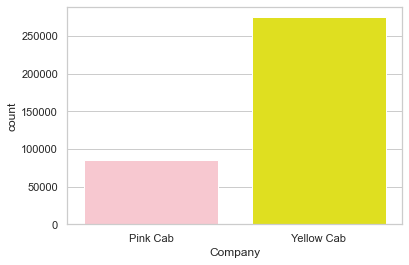

In [58]:
sns.set_theme(style="whitegrid")
companies = sns.countplot(x="Company", palette=['Pink', 'Yellow'], data=clean_df)

* Overall, the yellow cab is used more than the pink cab

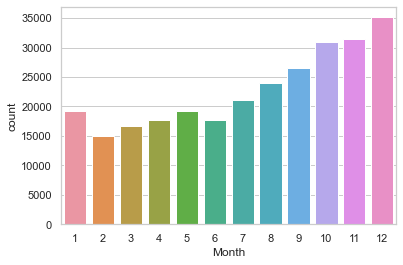

In [59]:
sns.set_theme(style="whitegrid")
yellow_per_month = sns.countplot(x="Month", data=YellowCab)

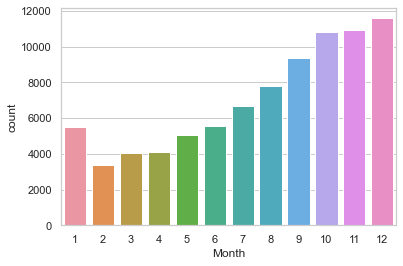

In [61]:
sns.set_theme(style="whitegrid")
pink_per_month = sns.countplot(x="Month", data=PinkCab)

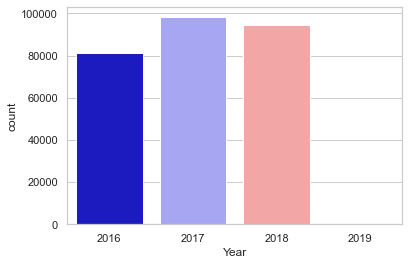

In [62]:
sns.set_style("whitegrid")
yellow_per_year = sns.countplot(x="Year",  palette='seismic', data=YellowCab)

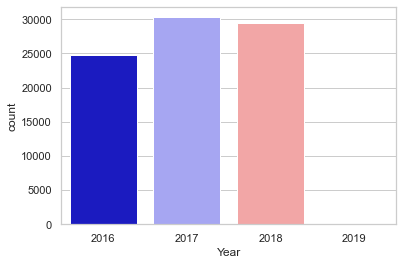

In [63]:
sns.set_style("whitegrid")
pink_per_year = sns.countplot(x="Year",  palette='seismic', data= PinkCab)

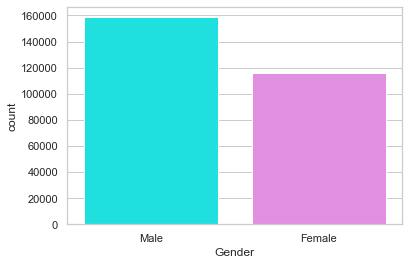

In [64]:
sns.set_theme(style="whitegrid")
YellowGender = sns.countplot(x="Gender", palette=['Cyan', 'Violet'], data=YellowCab)

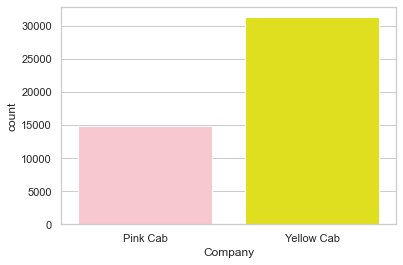

In [65]:
# PinkGender = sns.countplot(x="Gender", palette=['Cyan', 'Violet'], data= PinkCab)
sns.set_theme(style="whitegrid")
unique_custs = sns.countplot(x="Company", palette=['Pink', 'Yellow'], data=one_time_cust)

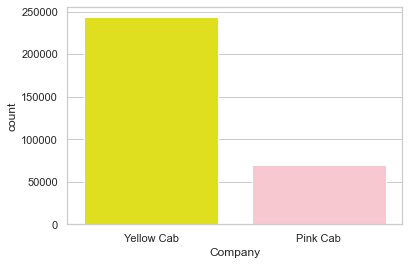

In [66]:
sns.set_theme(style="whitegrid")
cust_rep = sns.countplot(x="Company", palette=['Yellow', 'Pink'], data = repeated_cust)

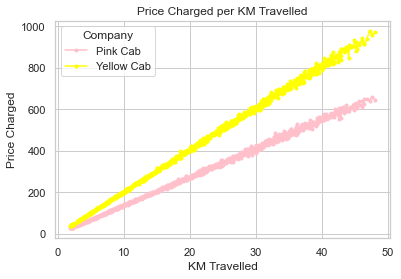

In [67]:
yearsales=pd.pivot_table(final_df,index='KM Travelled',columns='Company' ,values='Price Charged')
yearsales.plot(marker='.', color=['pink', 'yellow'])
plt.ylabel('Price Charged')
plt.title('Price Charged per KM Travelled')
plt.show()



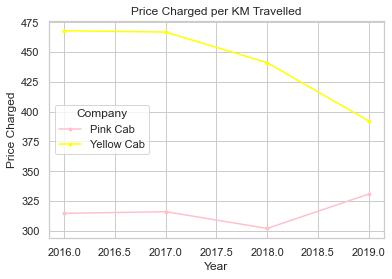

In [68]:
yearsales=pd.pivot_table(clean_df,index='Year',columns='Company' ,values='Price Charged' )
yearsales.plot(marker='.', color=['pink', 'yellow'])
plt.ylabel('Price Charged')
plt.title('Price Charged per KM Travelled')
plt.show()

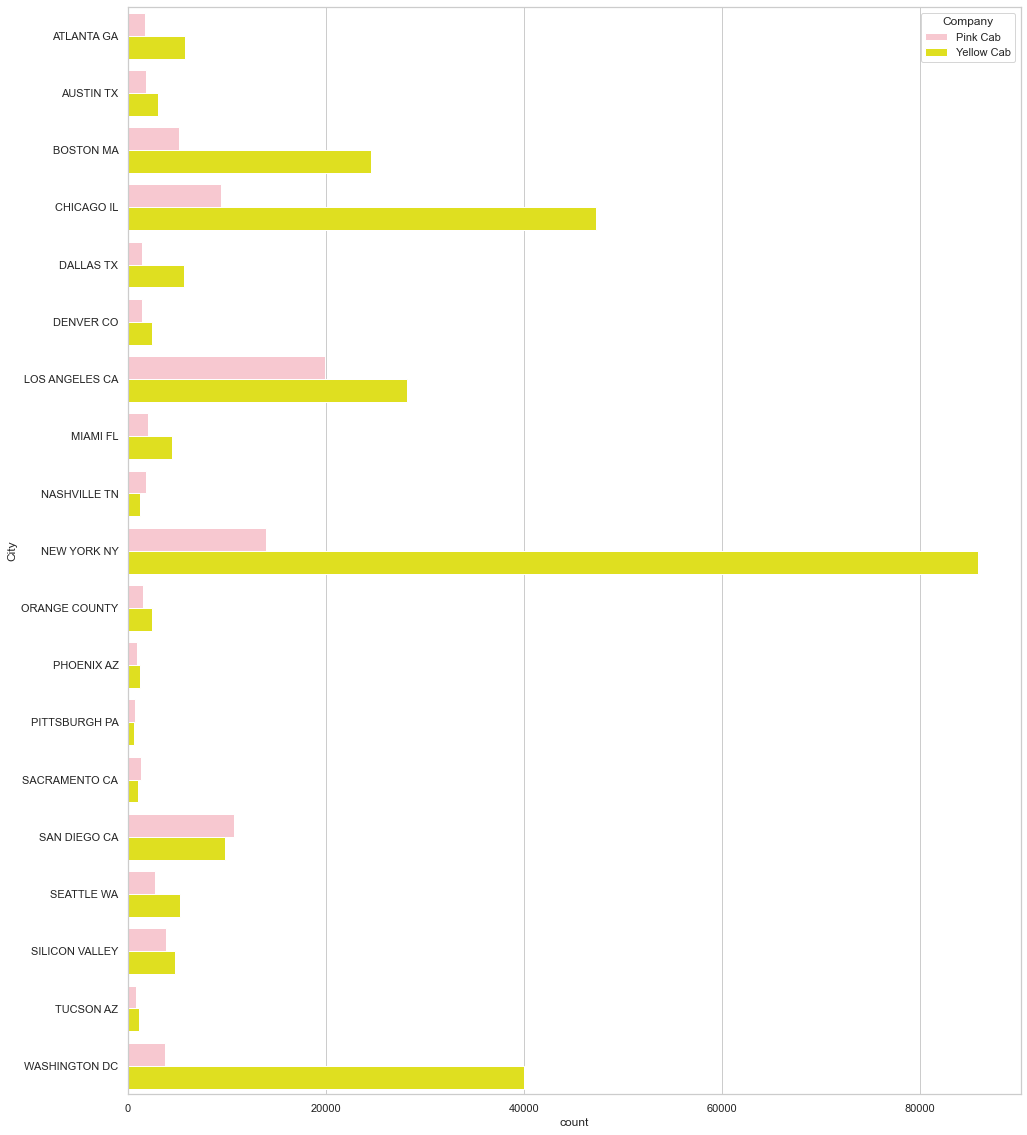

In [69]:
f, city_comparison = plt.subplots(figsize=(16, 20))
city_comparison = sns.countplot(y='City', hue='Company', palette=['Pink', 'Yellow'], data=clean_df)
plt.show()

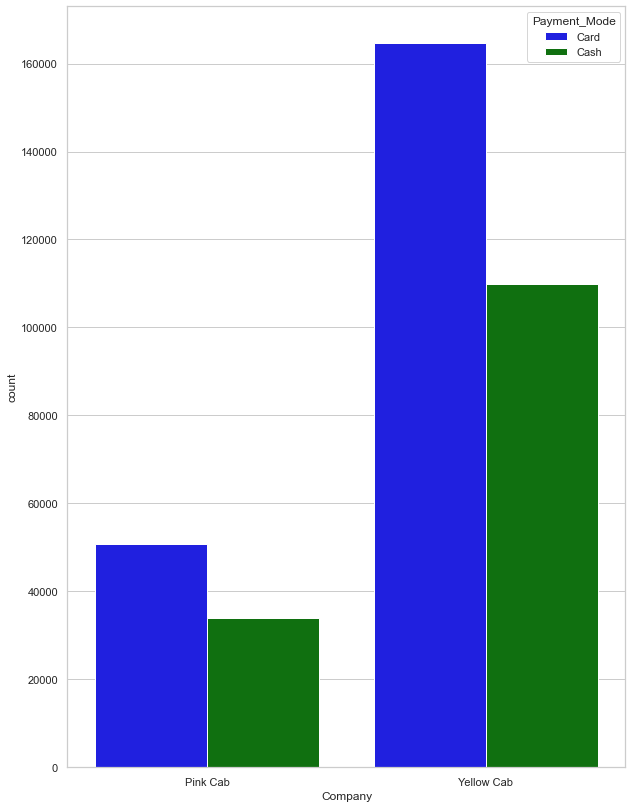

In [70]:
f, payment = plt.subplots(figsize=(10, 14))
sns.set(style="whitegrid")
payment = sns.countplot(x='Company', hue='Payment_Mode', palette=['Blue', 'Green'], data=clean_df)
plt.show()

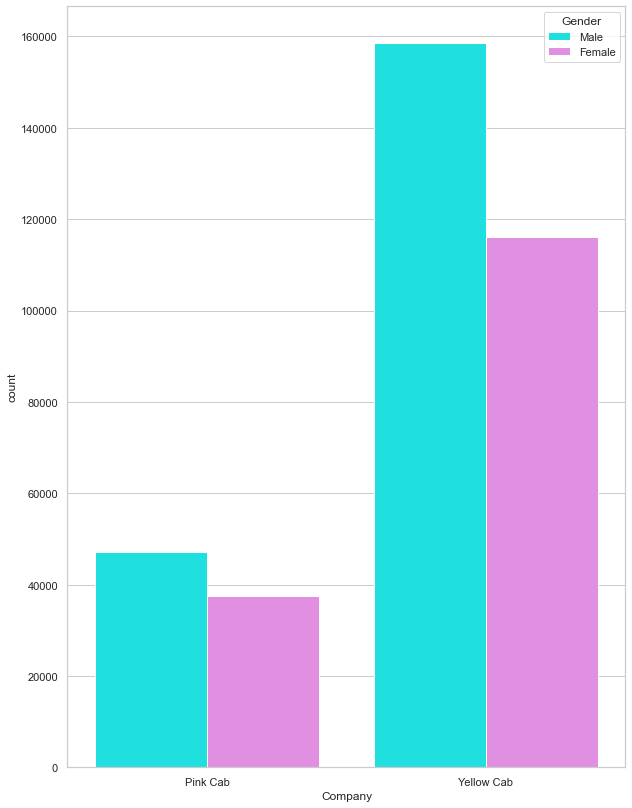

In [71]:
f, gender = plt.subplots(figsize=(10, 14))
sns.set(style="whitegrid")
gender = sns.countplot(x='Company', hue='Gender', palette=['Cyan', 'Violet'], data=clean_df)
plt.show()

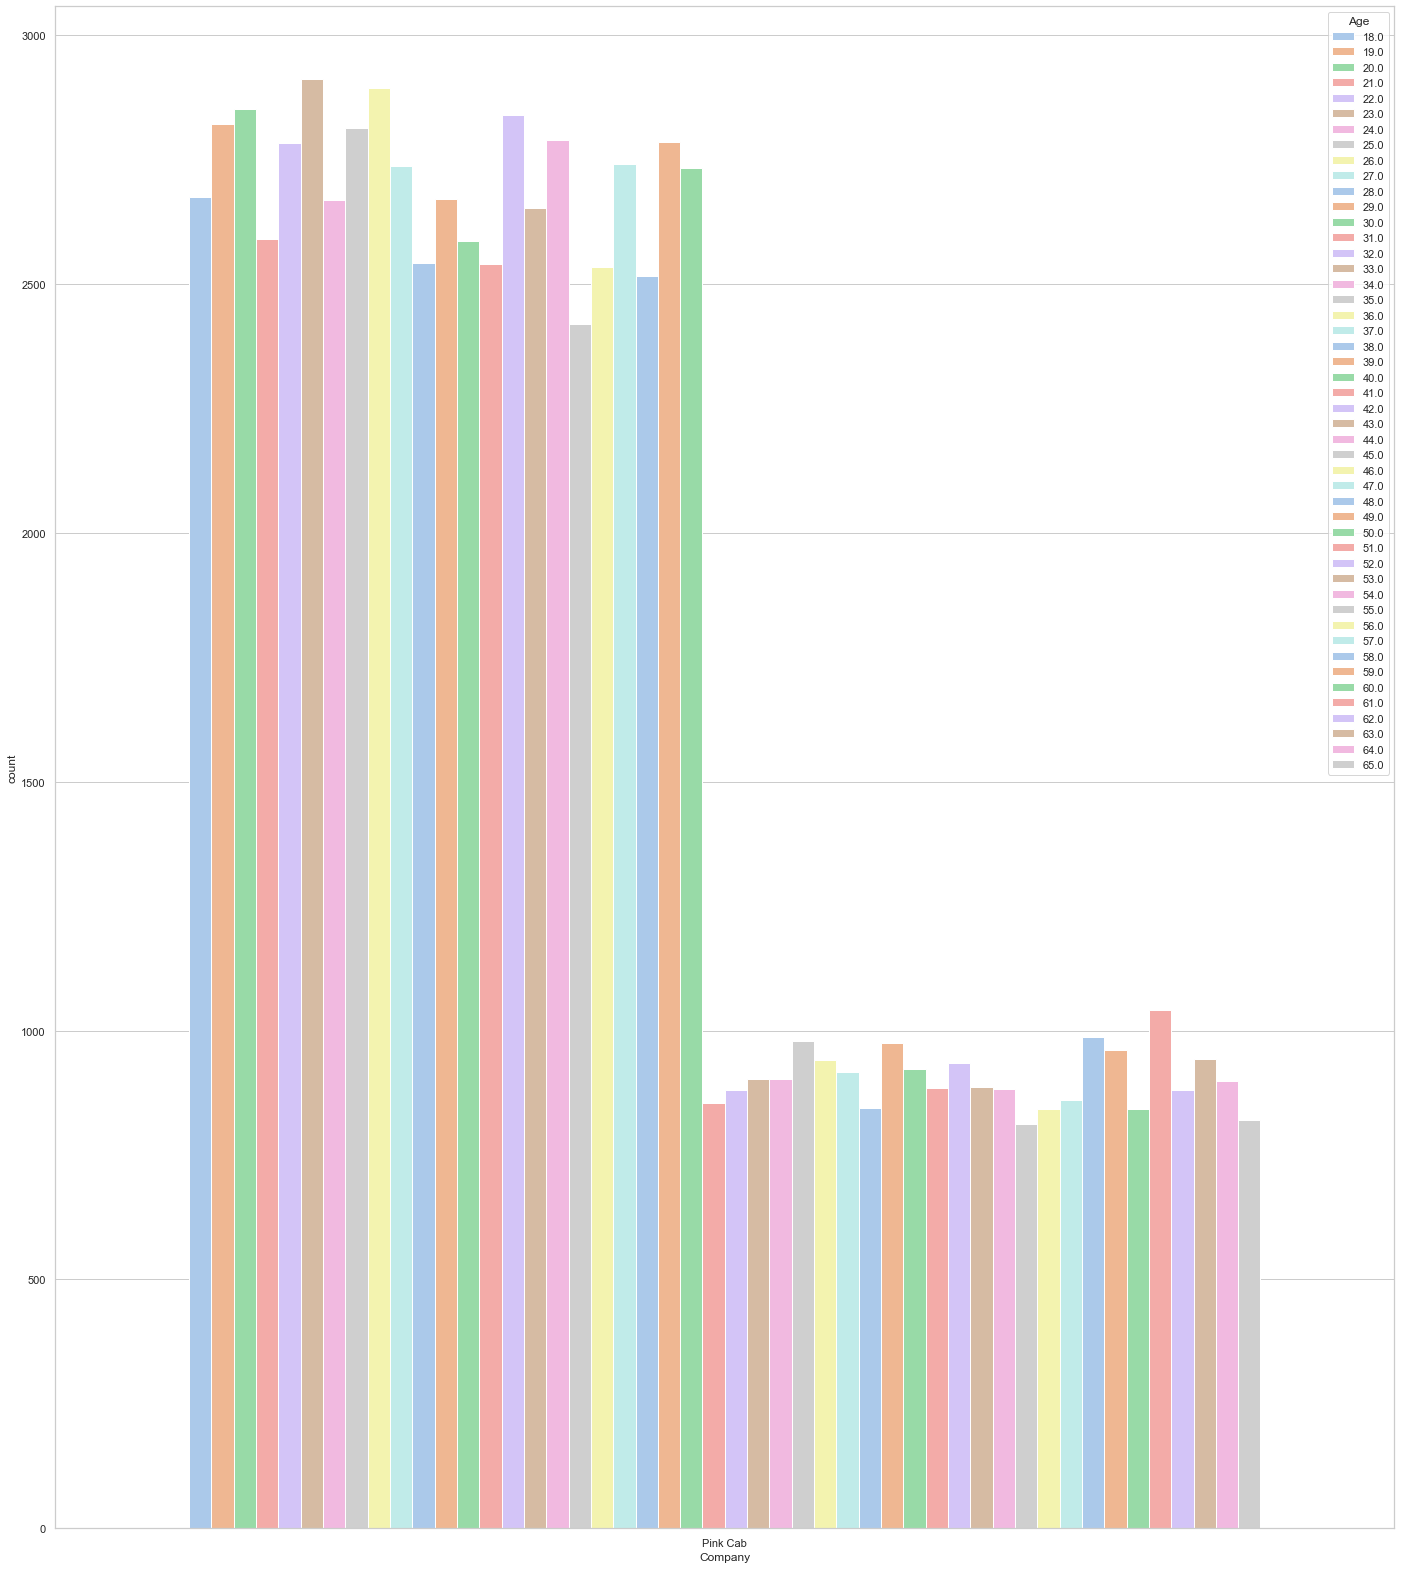

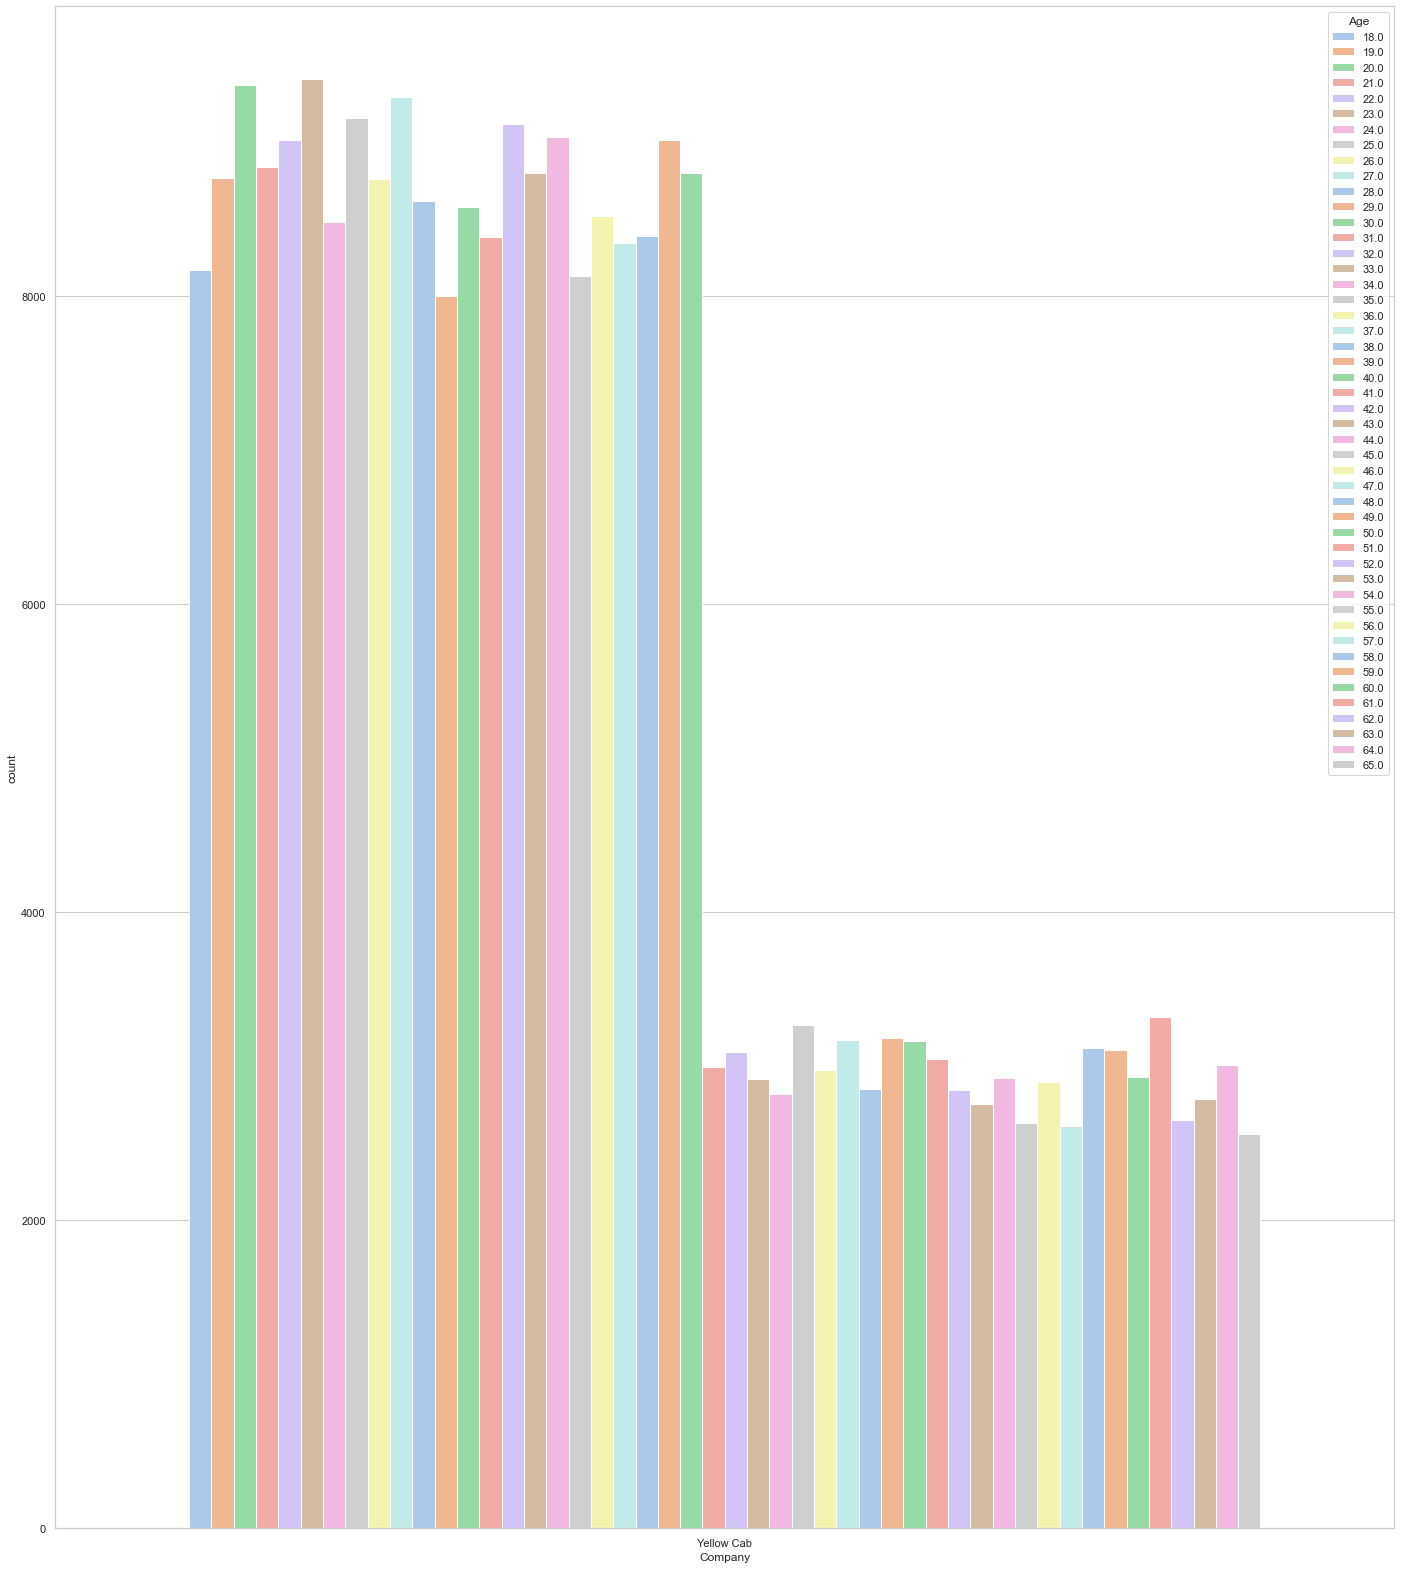

In [72]:
f, ax = plt.subplots(figsize=(24, 28))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Age', palette='pastel', data=PinkCab)
plt.show()
f, ax = plt.subplots(figsize=(24, 28))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Age', palette='pastel', data=YellowCab)
plt.show()

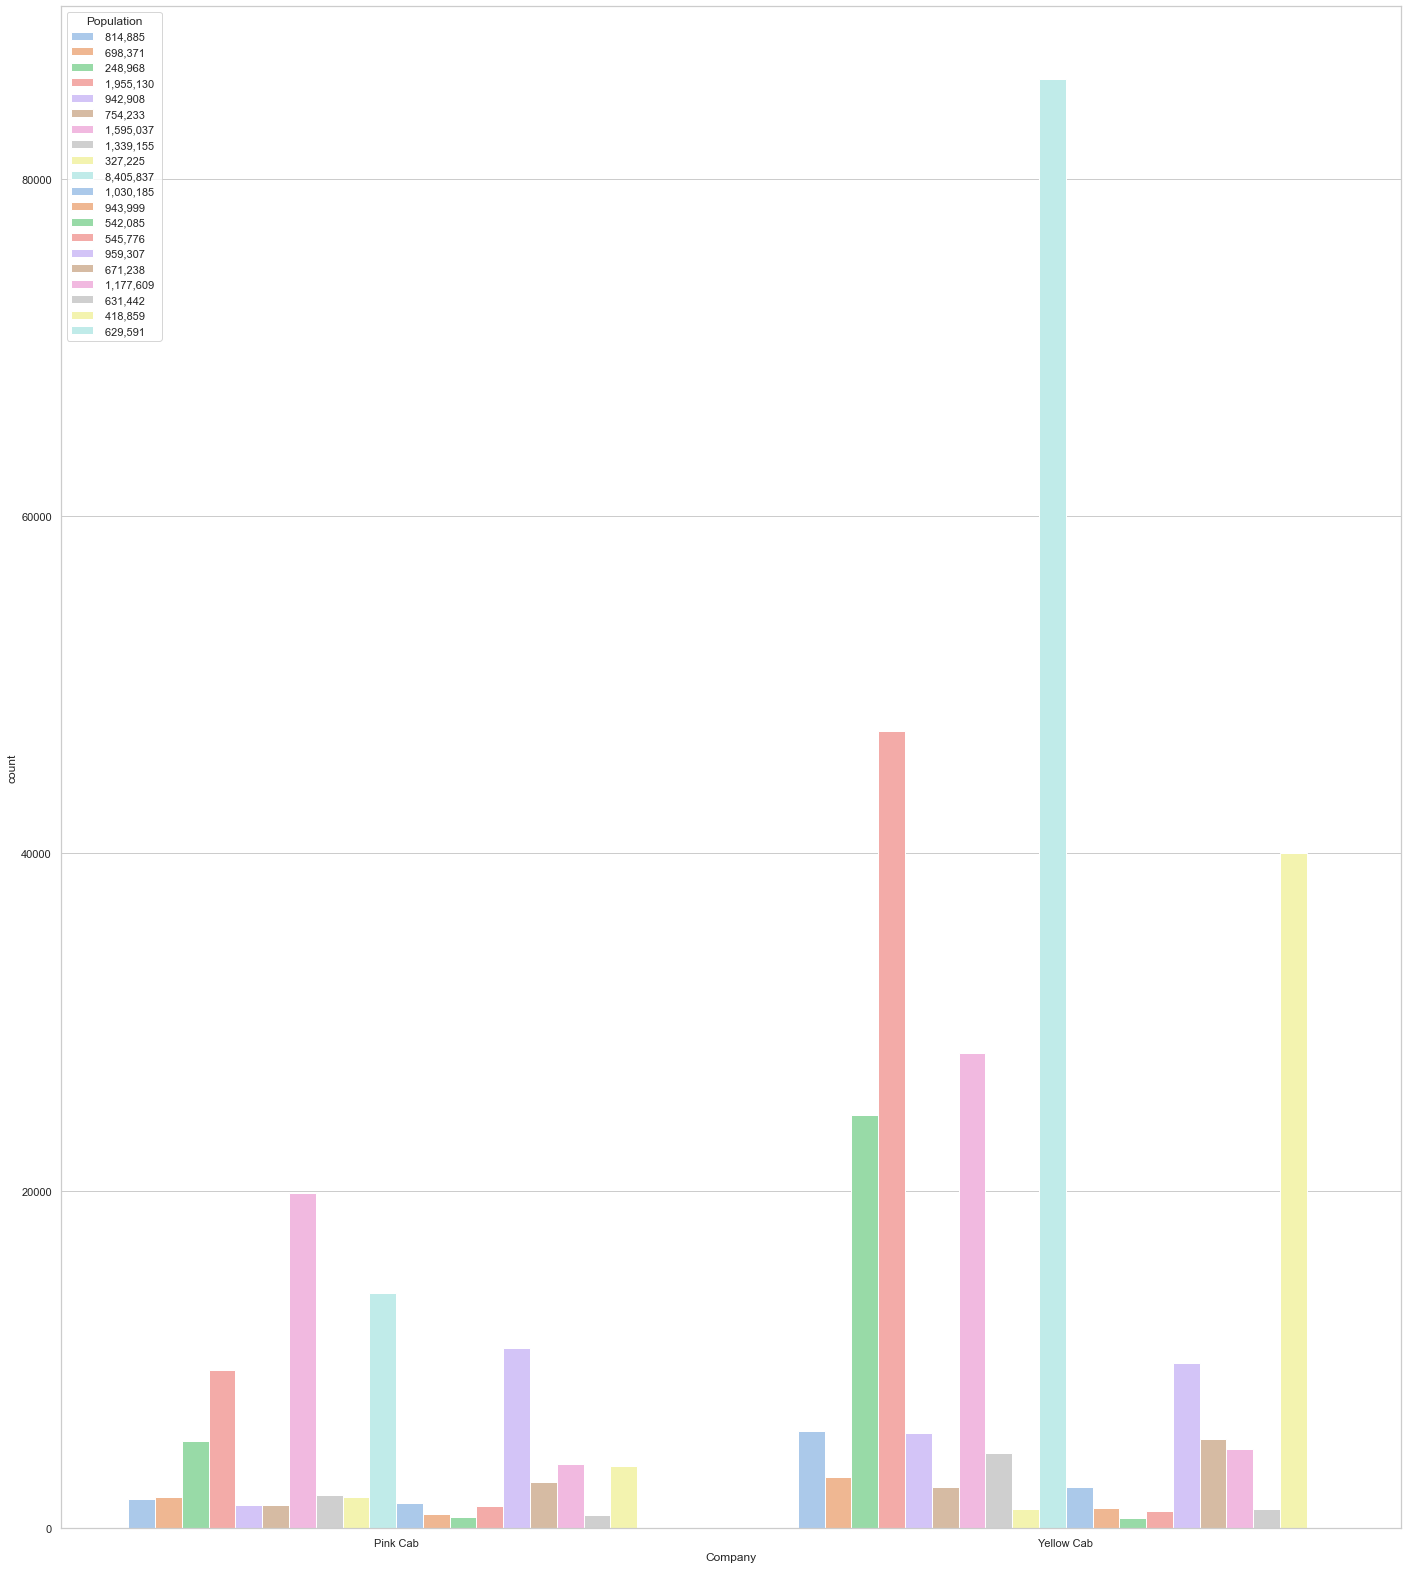

In [73]:
f, ax = plt.subplots(figsize=(24, 28))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Population', palette='pastel', data=final_df)
plt.show()

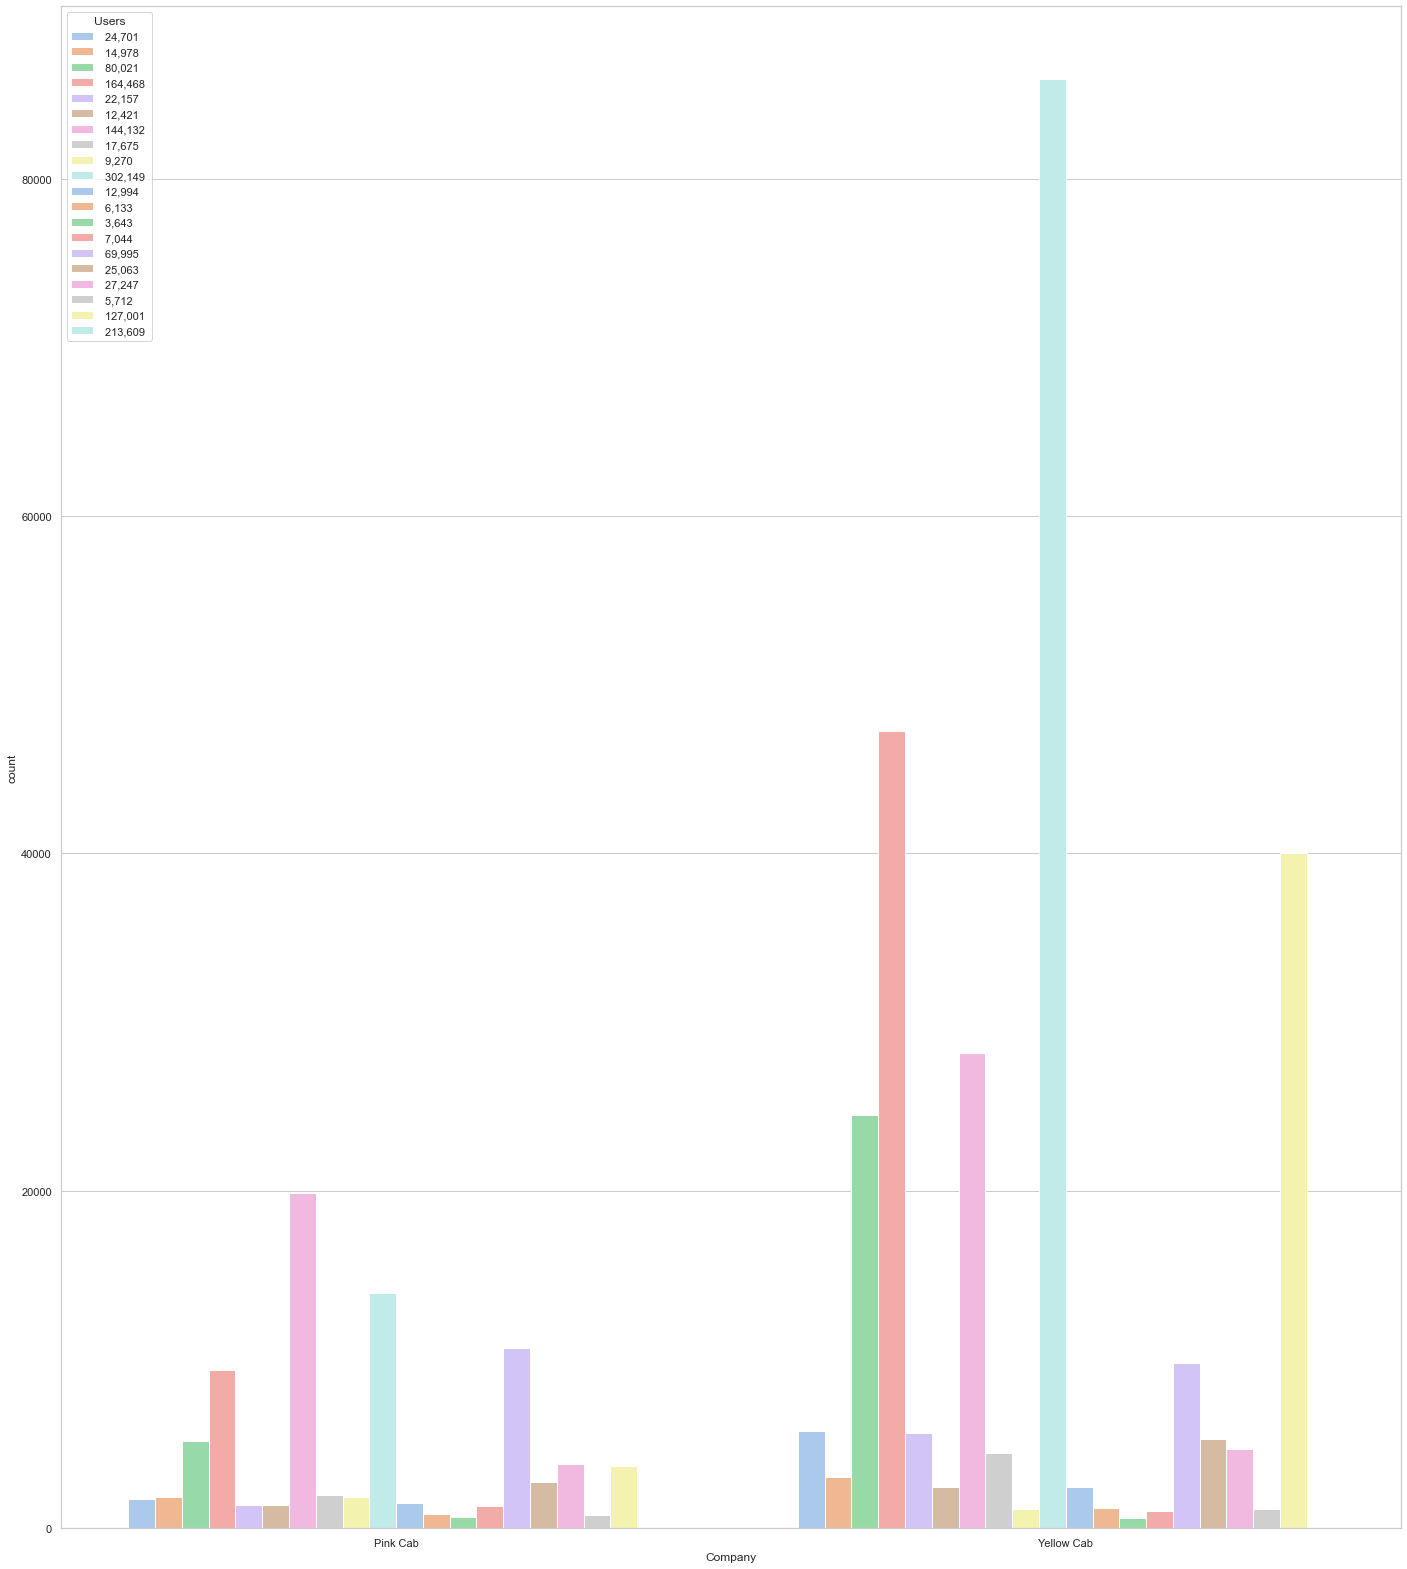

In [74]:
f, ax = plt.subplots(figsize=(24, 28))
sns.set(style="whitegrid")
ax = sns.countplot(x='Company', hue='Users', palette='pastel', data=final_df)
plt.show()

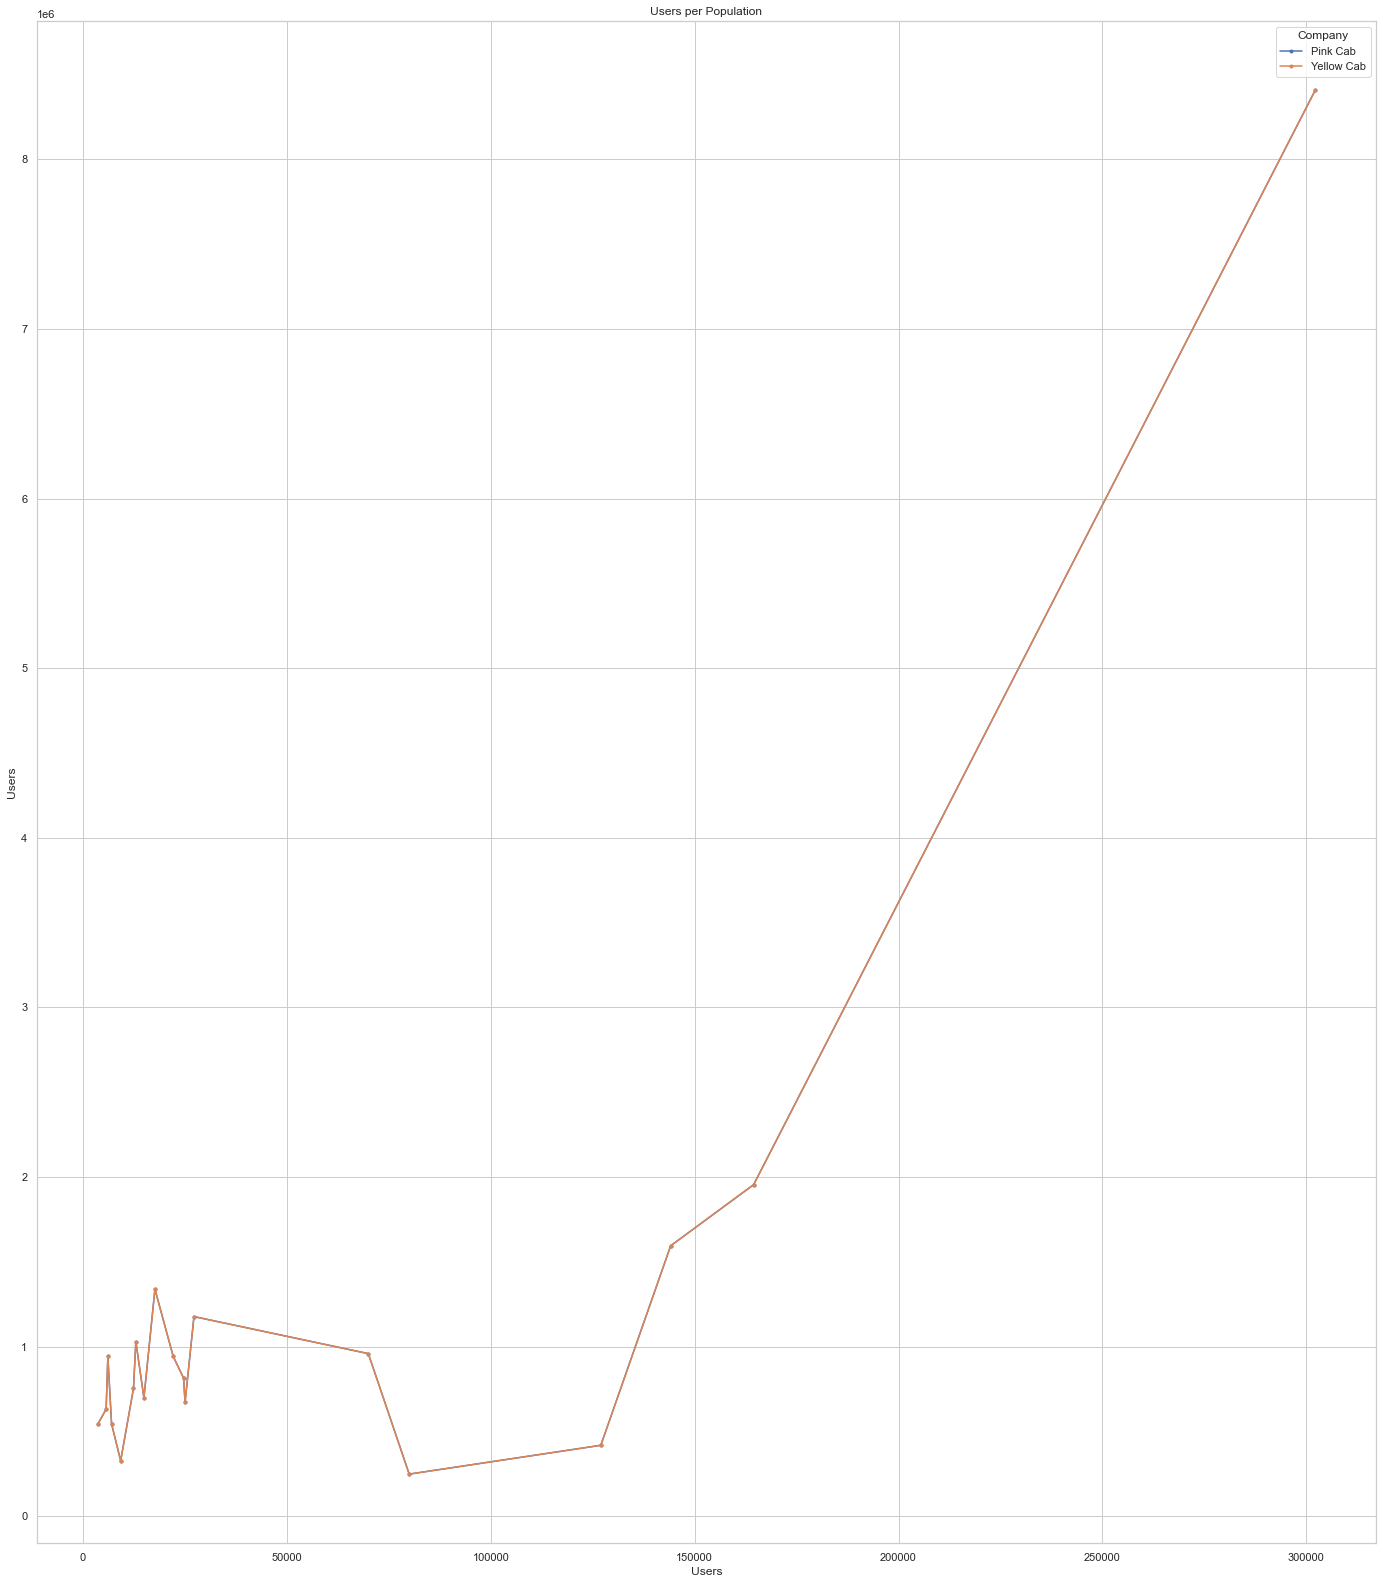

In [75]:
yearsales=pd.pivot_table(clean_df,index='Users',columns='Company' ,values='Population')
yearsales.plot(marker='.', figsize=(24,28))
plt.ylabel('Users')
plt.title('Users per Population')
plt.show()

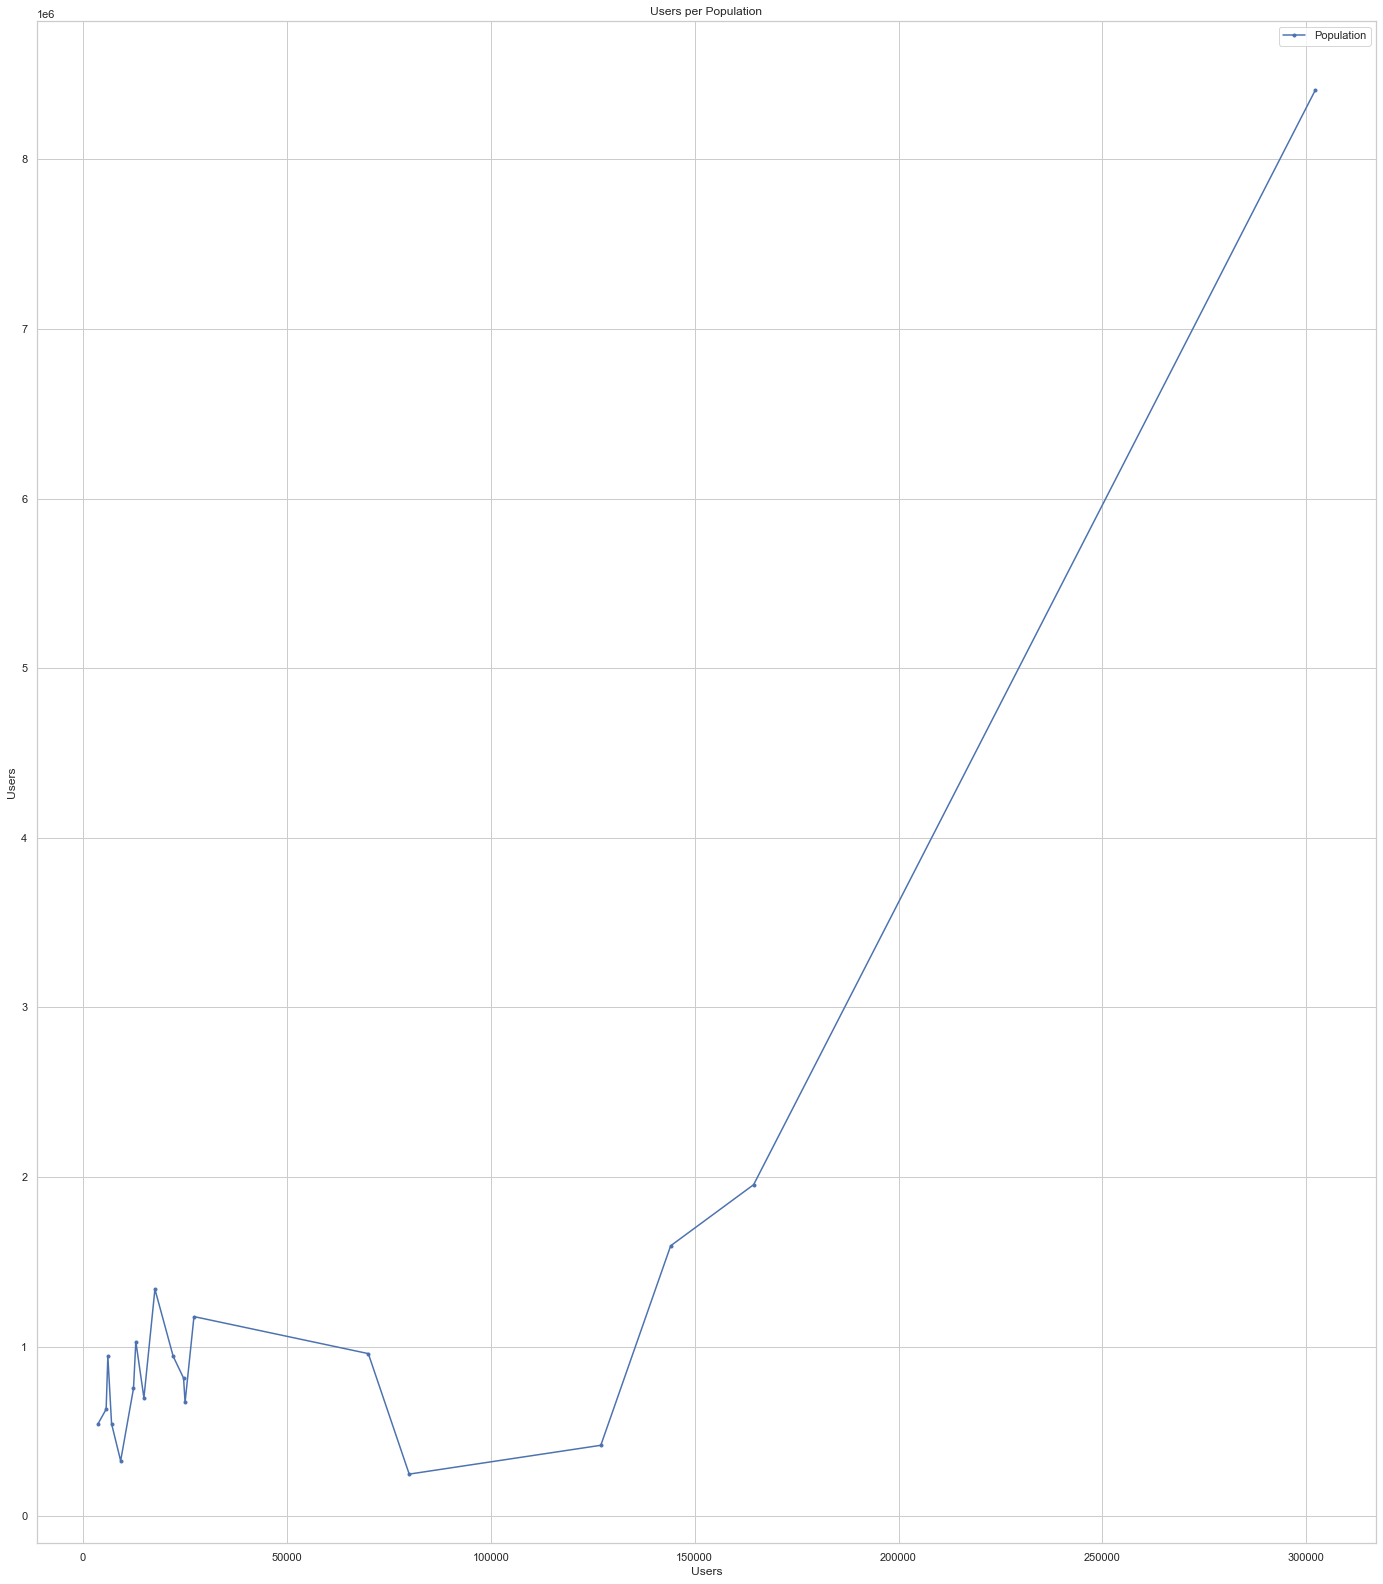

In [76]:
yearsales=pd.pivot_table(YellowCab,index='Users' ,values='Population')
yearsales.plot(marker='.', figsize=(24,28))
plt.ylabel('Users')
plt.title('Users per Population')
plt.show()

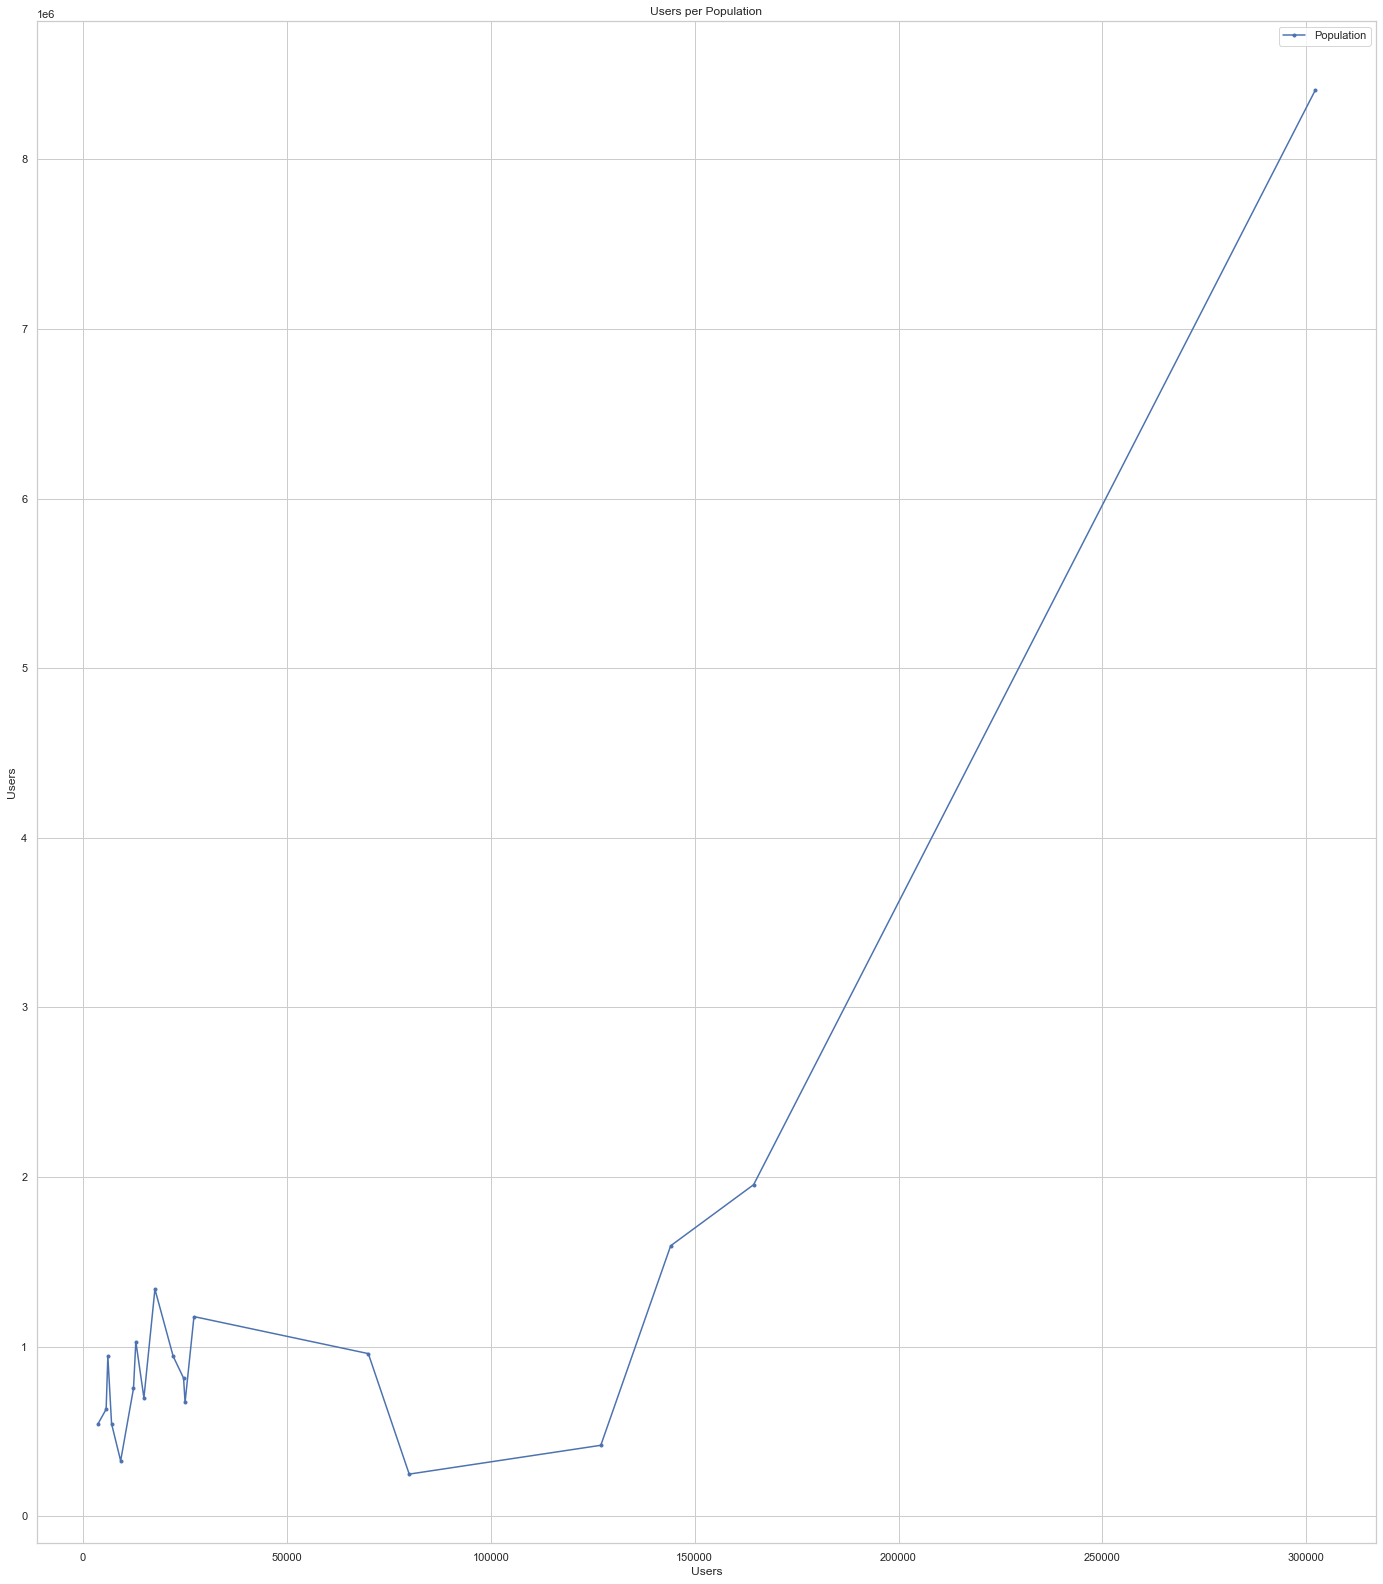

In [77]:
yearsales=pd.pivot_table(PinkCab,index='Users' ,values='Population')
yearsales.plot(marker='.', figsize=(24,28))
plt.ylabel('Users')
plt.title('Users per Population')
plt.show()